<a href="https://colab.research.google.com/github/Msamuelsons/preco-jogadores-predicao/blob/main/predicao_preco_jogadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import pandas as pd
import matplotlib.pyplot as plt


In [238]:
dados = pd.read_csv('/content/final_data.csv')
pd.set_option('display.max_columns', 22)
dados.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [239]:
dados.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [240]:
dados.drop('player', inplace=True, axis=1)

In [241]:
dados.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [242]:
def total_valores(lista, valor):
  return len(list(lista[f'{valor}'].unique()))

In [243]:
total_times = total_valores(dados, 'team')
print(f'Total de times: {total_times}') # total de times

Total de times: 374


In [244]:
total_jogadores = total_valores(dados, 'name')
print(f'Total de jogadores: {total_jogadores}') # total de jogadores

Total de jogadores: 10584


In [245]:
jogadores = dados[['name', 'team', 'current_value']]
jogadores_caros = jogadores.sort_values(by='current_value', ascending=False)

top_10_caros = jogadores_caros.head(20)
print(top_10_caros)

                       name                 team  current_value
2644          Kylian Mbappé  Paris Saint-Germain      180000000
453          Erling Haaland      Manchester City      170000000
1521        Vinicius Junior          Real Madrid      150000000
960         Jude Bellingham    Borussia Dortmund      120000000
450              Phil Foden      Manchester City      110000000
1017          Jamal Musiala        Bayern Munich      110000000
474             Bukayo Saka           Arsenal FC      110000000
1516      Federico Valverde          Real Madrid      100000000
1523                Rodrygo          Real Madrid      100000000
2023         Victor Osimhen           SSC Napoli      100000000
1540                  Pedri         FC Barcelona      100000000
1541                   Gavi         FC Barcelona       90000000
501              Harry Kane    Tottenham Hotspur       90000000
517          Enzo Fernández           Chelsea FC       85000000
1515    Aurélien Tchouaméni          Rea

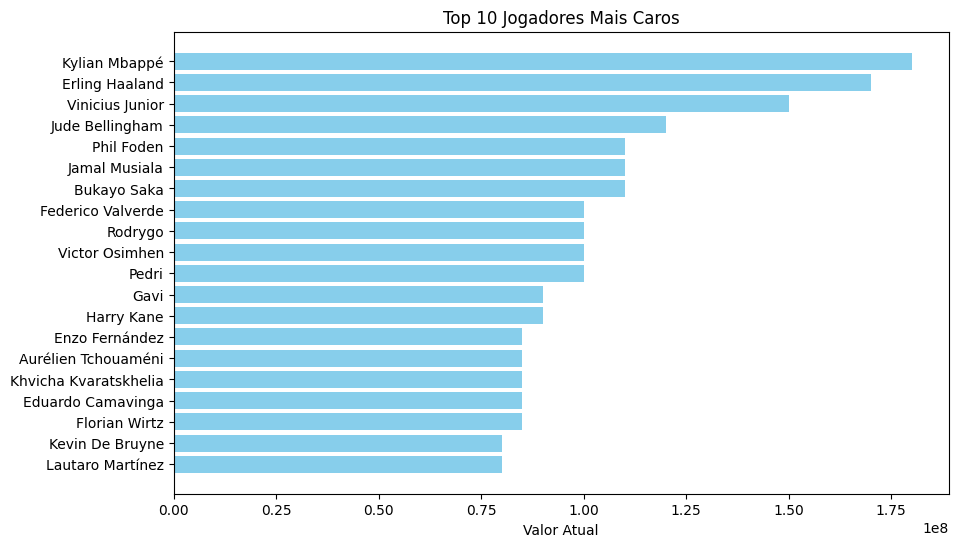

In [246]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_caros['name'], top_10_caros['current_value'], color='skyblue')
plt.xlabel('Valor Atual')
plt.title('Top 10 Jogadores Mais Caros')
plt.gca().invert_yaxis()
plt.show()

## Melhores Jogadores por Posições
>> Montando nosso time do ano

In [247]:
# Atacante
#dados['position'].value_counts()
atacantes = dados[dados['position'] == 'Attack Centre-Forward']
atacantes_goleador = atacantes.sort_values(by='goals', ascending=False)
maior_goleador = atacantes_goleador.head(1)
maior_goleador

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
3799,Sport Club Corinthians Paulista,Júnior Moraes,Attack Centre-Forward,176.0,36.0,1,6.0,0.0,0.0,0.0,0.0,0.0,0.0,15,599,84,8,400000,5000000,4,0


In [248]:
# Goleiro
goleiros = dados[dados['position'] == 'Goalkeeper']
melhores_goleiros = goleiros.sort_values(by='clean sheets', ascending=True)
melhores_goleiros

melhores_goleiros

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
5284,Stoke City,Frank Fielding,Goalkeeper,185.000000,35.0,2,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,180,400,51,2,200000,1000000,1,0
8893,Gamba Osaka,Masaaki Higashiguchi,Goalkeeper,184.000000,37.0,7,0.0,0.0,0.0,0.0,0.0,1.714286,0.000000,630,678,92,5,200000,1450000,1,0
8894,Gamba Osaka,Kei Ishikawa,Goalkeeper,185.000000,30.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,100000,100000,1,0
8962,Ettifaq FC,Abdullah Al-Saleh,Goalkeeper,185.000000,35.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,50000,250000,1,0
7869,Club Atlético Platense,Augusto Alcorcel,Goalkeeper,181.240353,22.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,25000,25000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,SSC Napoli,Davide Marfella,Goalkeeper,192.000000,23.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,9.000000,10,6,1,1,50000,100000,1,0
2622,Paris Saint-Germain,Alexandre Letellier,Goalkeeper,193.000000,32.0,2,0.0,0.0,0.0,0.0,0.0,0.000000,10.588235,17,307,53,5,400000,1500000,1,0
1459,Getafe CF,Diego Conde,Goalkeeper,188.000000,24.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,18.000000,5,0,0,0,300000,400000,1,0
7897,Instituto AC Córdoba,Emanuel Sittaro,Goalkeeper,185.000000,23.0,1,0.0,0.0,0.0,0.0,0.0,0.000000,18.000000,5,0,0,0,25000,25000,1,0


In [249]:
goleiros_top = melhores_goleiros[['name', 'clean sheets']]
goleiros_top

,name,clean sheets
5284,Frank Fielding,0.000000
8893,Masaaki Higashiguchi,0.000000
8894,Kei Ishikawa,0.000000
8962,Abdullah Al-Saleh,0.000000
7869,Augusto Alcorcel,0.000000
...,...,...
2001,Davide Marfella,9.000000
2622,Alexandre Letellier,10.588235
1459,Diego Conde,18.000000
7897,Emanuel Sittaro,18.000000


In [250]:
goleiros_menos_clean_sheets = goleiros_top[goleiros_top['clean sheets'] == goleiros_top['clean sheets'].max()]
goleiros_menos_clean_sheets

,name,clean sheets
2055,Antonio Mirante,90.0


In [251]:
y = dados['current_value']
x = dados.drop('current_value', axis=1)

In [252]:
x['position'].value_counts()

Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: position, dtype: int64

In [253]:
x['team'].value_counts()

Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: team, Length: 374, dtype: int64

In [254]:
x.drop('name', axis=1, inplace=True)

In [255]:
x

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,70000000,1,0
1,Manchester United,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,22000000,1,0
2,Manchester United,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,6000000,1,0
3,Manchester United,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,2,0
4,Manchester United,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,4,1
10750,Western Sydney Wanderers,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,4,0
10751,Western Sydney Wanderers,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,4,0
10752,Western Sydney Wanderers,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,4,0


In [256]:
from sklearn.preprocessing import OneHotEncoder

In [257]:
encoder = OneHotEncoder(sparse_output=False)
colunas = ['team', 'position']
x_encoded = encoder.fit_transform(dados[colunas])


In [258]:
x_encoded
pd.DataFrame(x_encoded)

,0,1,2,3,4,5,6,7,8,9,10,...,379,380,381,382,383,384,385,386,387,388,389
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
x.drop(columns=['team', 'position'], inplace=True, axis=1)

In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)


In [261]:
pd.DataFrame(x_norm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.113373e+00,1.247140,2.548245,-0.532971,-0.606773,-0.416711,-0.184919,-0.084128,2.454353,0.314349,3.422625,-0.433575,-0.463008,2.948703,4.768555,-1.737002,-0.666387
1,2.117750e+00,0.828503,-0.807041,-0.532971,-0.606773,-0.279250,-0.184919,-0.084128,2.511052,0.175438,-0.577159,2.237678,1.803642,-0.256629,1.183591,-1.737002,-0.666387
2,9.698906e-01,2.293733,-1.221739,-0.532971,-0.606773,-0.438879,-0.184919,-0.084128,1.096013,0.951733,-1.077750,3.305038,2.915584,0.544704,-0.011398,-1.737002,-0.666387
3,-8.953810e-01,-0.218090,1.718849,-0.413731,-0.214852,0.080861,-0.184919,-0.084128,-0.297651,-0.048552,1.947563,0.325564,0.264031,1.880259,3.274820,-0.723122,-0.666387
4,1.400338e+00,0.828503,1.002552,-0.457033,-0.481975,-0.314755,-0.184919,-0.084128,-0.297651,-0.048552,1.266422,0.685155,1.504273,5.085590,5.515423,-0.723122,-0.666387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,-2.527020e-09,-1.264683,-0.769341,0.213940,0.006968,0.171549,-0.184919,-0.084128,-0.297651,-0.048552,-0.716157,-0.673302,-0.676843,-0.523740,-0.453917,1.304637,1.500630
10750,1.256856e+00,-0.427408,-0.392343,1.048996,0.693139,-0.007914,-0.184919,-0.084128,-0.297651,-0.048552,-0.505434,-0.091106,0.092963,-0.523740,-0.437112,1.304637,-0.666387
10751,-2.527020e-09,-1.474001,-0.618542,1.058884,-0.606773,-0.005221,-0.184919,-0.084128,-0.297651,-0.048552,-0.747320,-0.673302,-0.676843,-0.523740,-0.455784,1.304637,-0.666387
10752,-2.527020e-09,-1.264683,-0.731641,0.792041,0.119074,-0.438879,-0.184919,1.198195,-0.297651,-0.048552,-0.794312,-0.673302,-0.676843,-0.523740,-0.455784,1.304637,-0.666387


In [262]:
x_no_norm = pd.concat([x, pd.DataFrame(x_encoded)], axis=1)


In [263]:
x_concatenado = pd.concat([pd.DataFrame(x_norm), pd.DataFrame(x_encoded)], axis=1)


In [264]:
x_concatenado

,0,1,2,3,4,5,6,7,8,9,10,...,379,380,381,382,383,384,385,386,387,388,389
0,1.113373e+00,1.247140,2.548245,-0.532971,-0.606773,-0.416711,-0.184919,-0.084128,2.454353,0.314349,3.422625,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.117750e+00,0.828503,-0.807041,-0.532971,-0.606773,-0.279250,-0.184919,-0.084128,2.511052,0.175438,-0.577159,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.698906e-01,2.293733,-1.221739,-0.532971,-0.606773,-0.438879,-0.184919,-0.084128,1.096013,0.951733,-1.077750,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-8.953810e-01,-0.218090,1.718849,-0.413731,-0.214852,0.080861,-0.184919,-0.084128,-0.297651,-0.048552,1.947563,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.400338e+00,0.828503,1.002552,-0.457033,-0.481975,-0.314755,-0.184919,-0.084128,-0.297651,-0.048552,1.266422,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,-2.527020e-09,-1.264683,-0.769341,0.213940,0.006968,0.171549,-0.184919,-0.084128,-0.297651,-0.048552,-0.716157,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,1.256856e+00,-0.427408,-0.392343,1.048996,0.693139,-0.007914,-0.184919,-0.084128,-0.297651,-0.048552,-0.505434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,-2.527020e-09,-1.474001,-0.618542,1.058884,-0.606773,-0.005221,-0.184919,-0.084128,-0.297651,-0.048552,-0.747320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10752,-2.527020e-09,-1.264683,-0.731641,0.792041,0.119074,-0.438879,-0.184919,1.198195,-0.297651,-0.048552,-0.794312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=194)

x_pca = pca.fit_transform(x_concatenado)

explained_variance_ratio = pca.explained_variance_ratio_


# Verifica a quantidade de n_components para a porcentagem aplicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_explained_variance >= 0.8) + 1


In [266]:
pd.DataFrame(explained_variance_ratio)

,0
0,0.160144
1,0.128902
2,0.093542
3,0.065044
4,0.057150
...,...
189,0.000131
190,0.000131
191,0.000131
192,0.000130


In [267]:
len(explained_variance_ratio)

194

## Segmentação Treino e teste

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_concatenado, y, test_size=0.2, random_state=42)


## Florestas

In [269]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

# Avaliando o desempenho do modelo
mse = r2_score(y_test, predictions)
print(f'r2: {mse}')

r2: 0.9122143747636607


In [273]:
print(X_test.shape, y_test.shape)


(2151, 407) (2151,)


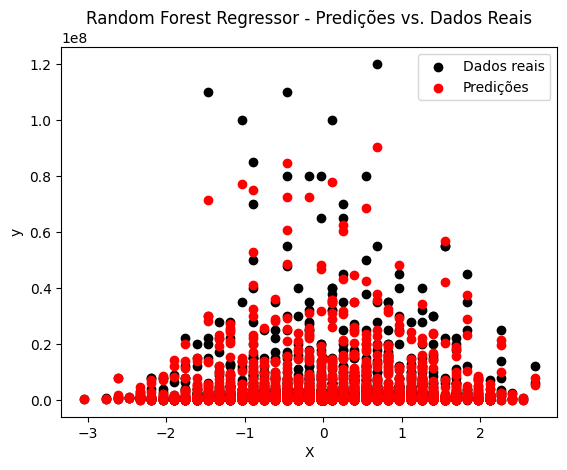

In [275]:
# Visualização das previsões em um gráfico de dispersão
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Dados reais')
plt.scatter(X_test.iloc[:, 0], predictions, color='red', label='Predições')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Random Forest Regressor - Predições vs. Dados Reais')
plt.legend()
plt.show()


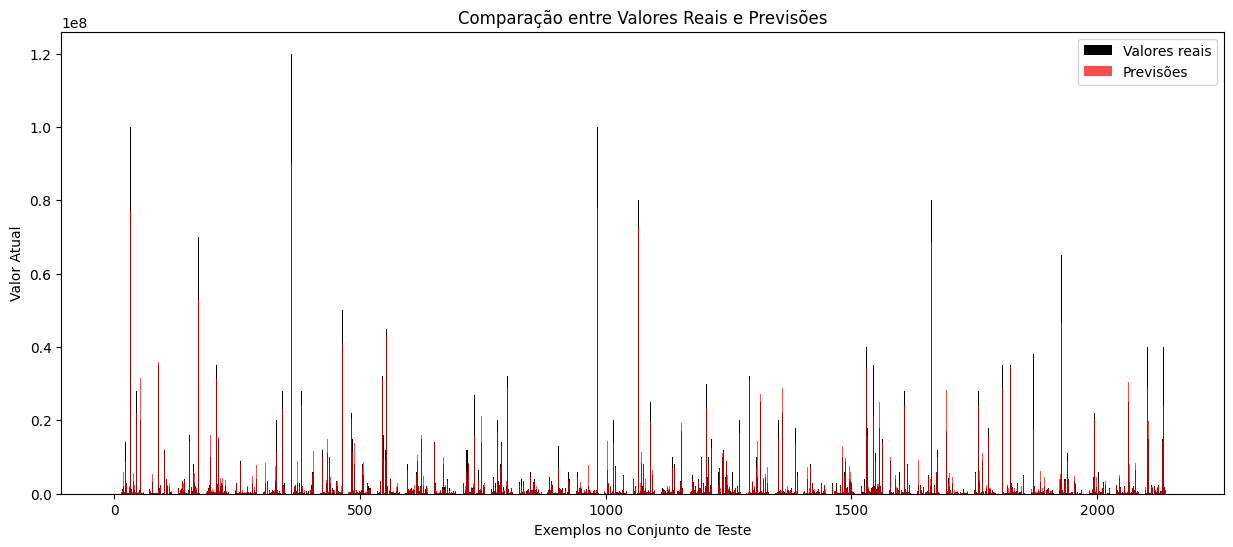

In [278]:
plt.figure(figsize=(15, 6))
plt.bar(range(len(y_test)), y_test, color='black', label='Valores reais')
plt.bar(range(len(predictions)), predictions, color='red', alpha=0.7, label='Previsões')
plt.xlabel('Exemplos no Conjunto de Teste')
plt.ylabel('Valor Atual')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.show()


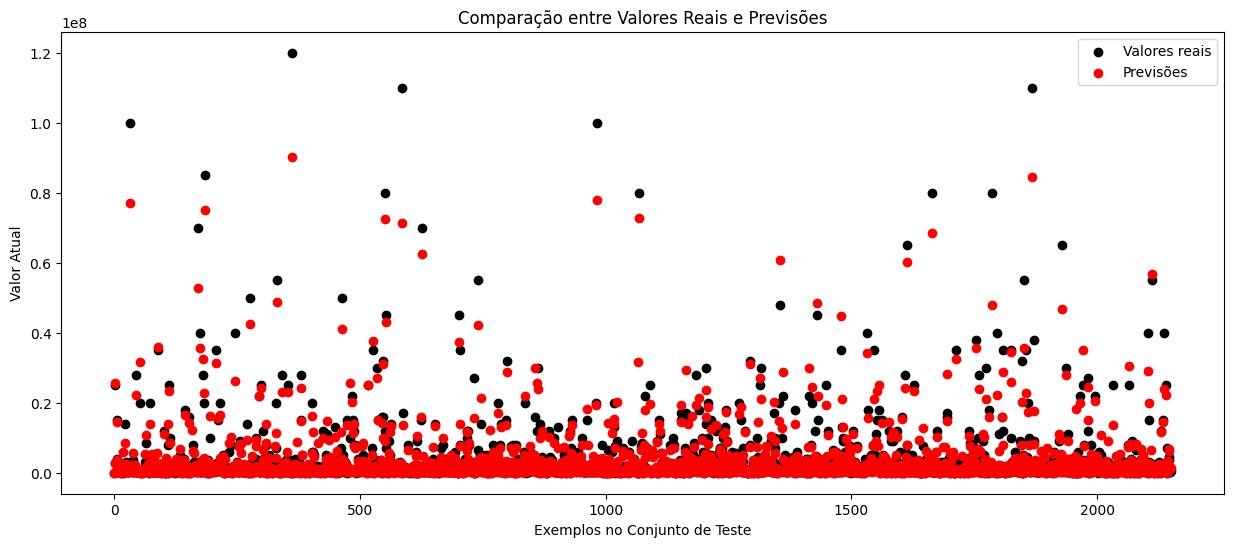

In [279]:
plt.figure(figsize=(15, 6))
plt.scatter(range(len(y_test)), y_test, color='black', label='Valores reais')
plt.scatter(range(len(predictions)), predictions, color='red', label='Previsões')
plt.xlabel('Exemplos no Conjunto de Teste')
plt.ylabel('Valor Atual')
plt.title('Comparação entre Valores Reais e Previsões')
plt.legend()
plt.show()


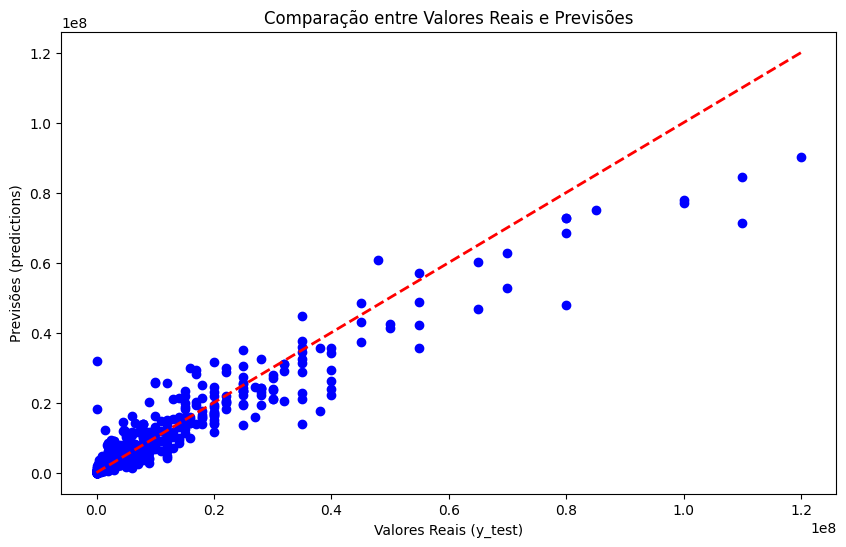

In [281]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Linha de referência (y=x)
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Previsões (predictions)')
plt.title('Comparação entre Valores Reais e Previsões')
plt.show()


## Curva de *Aprendizado*

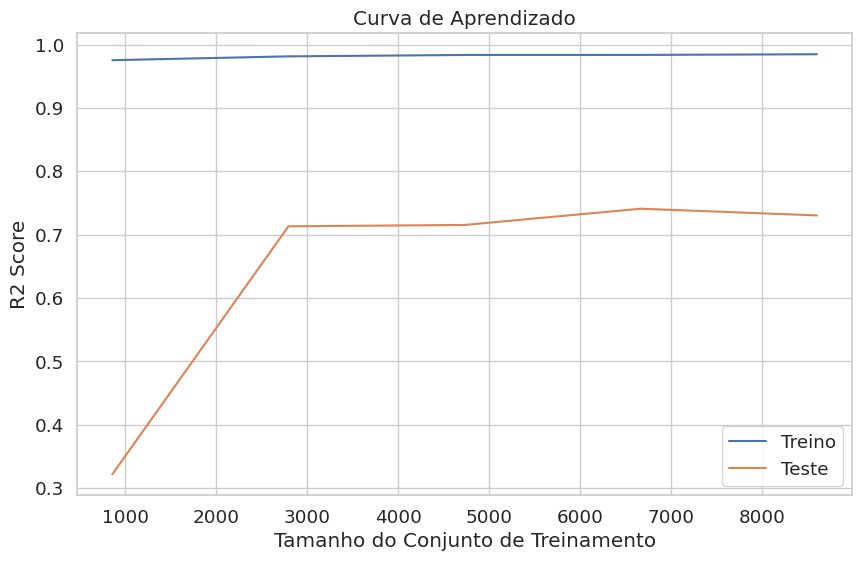

In [286]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rf_regressor, x_concatenado, y, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Treino')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Teste')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('R2 Score')
plt.title('Curva de Aprendizado')
plt.legend()
plt.show()
